<a href="https://colab.research.google.com/github/mustafabozkaya/Deep_Learning_Bootcamp/blob/master/AI/ML%20Challenge/eye_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
dest_path='content/eye_gender_data.zip',
unzip=True)

Unzipping...Done.


In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [ ]:
labels = pd.read_csv("/content/content/eye_gender_data/Training_set.csv") # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
traindata = pd.merge(images, labels, how = 'inner', on = 'filename')


In [ ]:
traindata.head()

,filename,filepaths,label
0,Image_1.jpg,/content/content/eye_gender_data/train/Image_1...,male
1,Image_2.jpg,/content/content/eye_gender_data/train/Image_2...,female
2,Image_3.jpg,/content/content/eye_gender_data/train/Image_3...,female
3,Image_4.jpg,/content/content/eye_gender_data/train/Image_4...,female
4,Image_5.jpg,/content/content/eye_gender_data/train/Image_5...,male


In [ ]:
data = [] # initialize an empty numpy array
df=pd.DataFrame()
image_size = 64 # image size taken is 100 here. one can take other size too
for i in range(len(traindata)):
  img_array = cv2.imread(traindata['filepaths'][i]) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data=pd.DataFrame({'image':[new_img_array],'label':traindata['label'][i]})
  df=df.append(data)
  i = i + 1


In [ ]:
df.head()

,image,label
0,"[[[188, 188, 188], [189, 189, 189], [190, 190,...",male
0,"[[[130, 161, 194], [135, 166, 199], [143, 172,...",female
0,"[[[149, 166, 223], [145, 162, 219], [142, 160,...",female
0,"[[[34, 81, 155], [33, 80, 154], [32, 81, 155],...",female
0,"[[[177, 177, 177], [181, 181, 181], [173, 173,...",male


In [ ]:
df['label'] = np.where(df['label']=='female', 1, 0)

In [ ]:
df.head()

,image,label
0,"[[[188, 188, 188], [189, 189, 189], [190, 190,...",0
0,"[[[130, 161, 194], [135, 166, 199], [143, 172,...",1
0,"[[[149, 166, 223], [145, 162, 219], [142, 160,...",1
0,"[[[34, 81, 155], [33, 80, 154], [32, 81, 155],...",1
0,"[[[177, 177, 177], [181, 181, 181], [173, 173,...",0


In [ ]:
df.shape

(9220, 2)

In [ ]:
len(df), df.label.value_counts()

(9220, 1    5058
 0    4162
 Name: label, dtype: int64)

In [ ]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
print(f"Shape of Training data: {train_data.shape}")
print(f"shape of Test data: {test_data.shape}")

Shape of Training data: (7376, 2)
shape of Test data: (1844, 2)


In [ ]:
train_data.label.value_counts(), test_data.label.value_counts()

(1    4029
 0    3347
 Name: label, dtype: int64, 1    1029
 0     815
 Name: label, dtype: int64)

In [ ]:
train_data.head()

,image,label
0,"[[[123, 146, 202], [126, 149, 205], [126, 146,...",0
0,"[[[107, 149, 196], [103, 145, 191], [99, 141, ...",0
0,"[[[72, 93, 145], [74, 95, 147], [74, 93, 144],...",0
0,"[[[16, 21, 54], [26, 31, 64], [41, 46, 78], [5...",0
0,"[[[216, 216, 216], [221, 221, 221], [219, 219,...",1


In [ ]:
def change_to_input_dimension(data):
    data=np.reshape(data.to_list(),(len(data),64,64,3))
    data=data/255.0
    return data
train_image=change_to_input_dimension(train_data.image)
test_image=change_to_input_dimension(test_data.image)

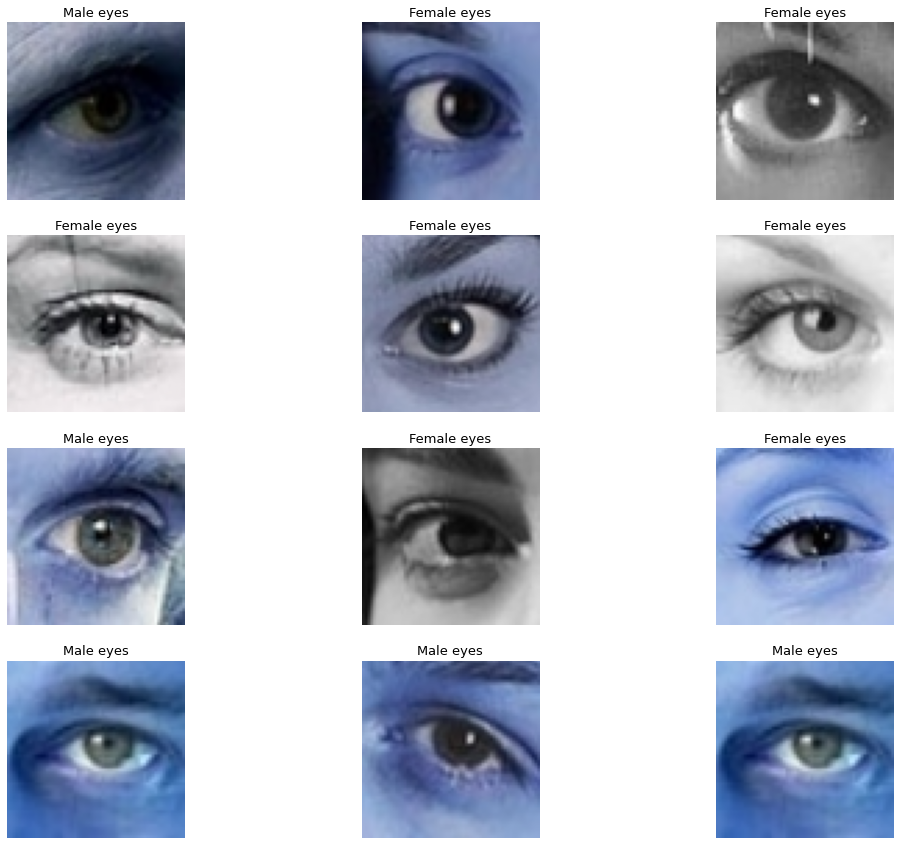

In [ ]:
plt.figure(figsize=(18,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    rnd_idx=np.random.randint(1000)
    if train_data.label.values[rnd_idx]==1:
        plt.title('Female eyes',fontdict={'size':13})
    else:
        plt.title('Male eyes',fontdict={'size':13})
    
    plt.axis('off')
    plt.imshow(train_image[rnd_idx])

In [ ]:
train_image.shape

(7376, 64, 64, 3)

In [ ]:
from keras.layers import BatchNormalization,Conv2D,MaxPool2D,Dense,Flatten,Input,GlobalMaxPooling2D,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
model=Sequential()
model.add(Input(shape=(64,64,3)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
dropout_44 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 16, 16, 64)      

In [ ]:
early_stop=EarlyStopping(patience=4)
reduce_lr=ReduceLROnPlateau(patience=2)

In [ ]:
r=model.fit(train_image,train_data.label.values,validation_data=(test_image,test_data.label.values),
            epochs=20,
            callbacks=[early_stop,reduce_lr]
           )

Epoch 1/20
231/231 [==============================] - 139s 594ms/step - loss: 0.6450 - accuracy: 0.7171 - val_loss: 0.8696 - val_accuracy: 0.5678
Epoch 2/20
231/231 [==============================] - 137s 595ms/step - loss: 0.3298 - accuracy: 0.8600 - val_loss: 0.4248 - val_accuracy: 0.8080
Epoch 3/20
231/231 [==============================] - 136s 590ms/step - loss: 0.2778 - accuracy: 0.8874 - val_loss: 0.2985 - val_accuracy: 0.8823
Epoch 4/20
231/231 [==============================] - 135s 586ms/step - loss: 0.2299 - accuracy: 0.9033 - val_loss: 0.2319 - val_accuracy: 0.9056
Epoch 5/20
231/231 [==============================] - 135s 584ms/step - loss: 0.2116 - accuracy: 0.9106 - val_loss: 0.2402 - val_accuracy: 0.9078
Epoch 6/20
231/231 [==============================] - 135s 584ms/step - loss: 0.1927 - accuracy: 0.9231 - val_loss: 0.2538 - val_accuracy: 0.9089
Epoch 7/20
231/231 [==============================] - 135s 582ms/step - loss: 0.1542 - accuracy: 0.9402 - val_loss: 0.1793 -

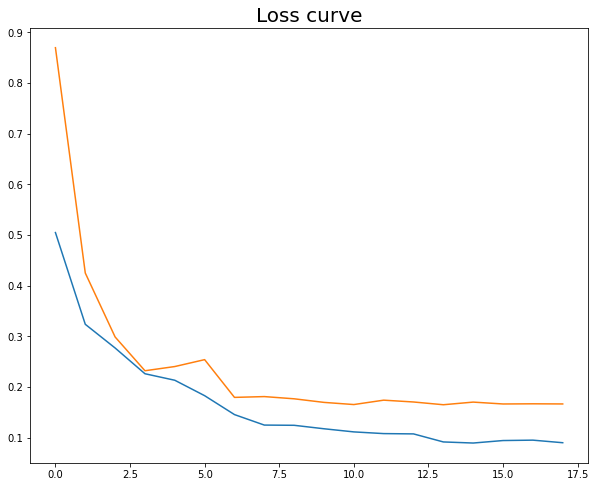

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Loss curve',fontdict={'size':20})
plt.show()

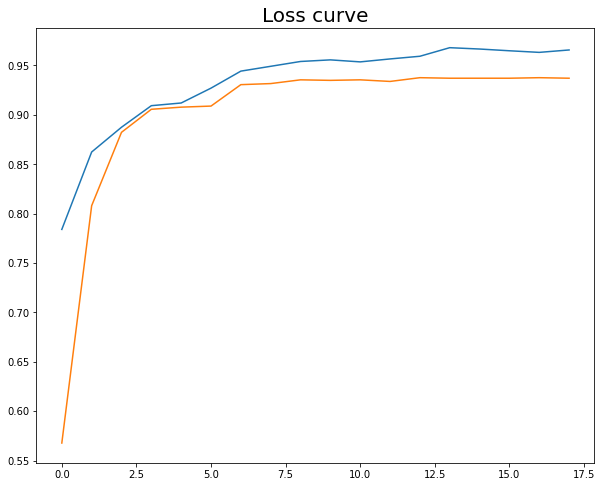

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Loss curve',fontdict={'size':20})
plt.show()

In [ ]:
print('CLASSIFICATION REPORT ON TRAIN DATASET \n\n')
print(classification_report(train_data.label,model.predict_classes(train_image),target_names=['male','female']))

print('CLASSIFICATION REPORT ON TEST DATASET \n\n')
print(classification_report(test_data.label,model.predict_classes(test_image),target_names=['male','female']))

CLASSIFICATION REPORT ON TRAIN DATASET 




/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        male       0.97      0.99      0.98      4029
      female       0.99      0.97      0.98      3347

    accuracy                           0.98      7376
   macro avg       0.98      0.98      0.98      7376
weighted avg       0.98      0.98      0.98      7376

CLASSIFICATION REPORT ON TEST DATASET 


              precision    recall  f1-score   support

        male       0.93      0.96      0.94      1029
      female       0.94      0.91      0.93       815

    accuracy                           0.94      1844
   macro avg       0.94      0.93      0.94      1844
weighted avg       0.94      0.94      0.94      1844



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


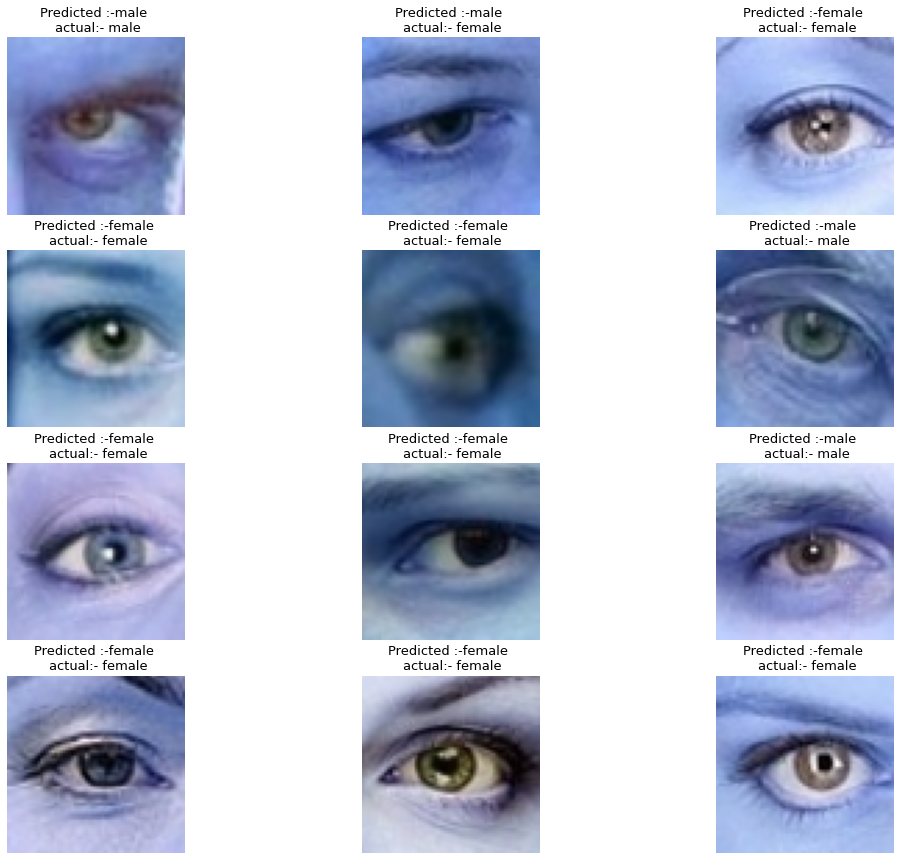

In [ ]:
plt.figure(figsize=(18,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    rnd_idx=np.random.randint(1000)
    pred=model.predict_classes(test_image[rnd_idx:rnd_idx+1])
    if test_data.label.values[rnd_idx]==1:
        if pred==1:
            plt.title('Predicted :-female \n actual:- female',fontdict={'size':13})
        else:
            plt.title('Predicted :-male \n actual:- female',fontdict={'size':13})
    else:
        if pred==1:
            plt.title('Predicted :-female \n actual:- male',fontdict={'size':13})
        else:
            plt.title('Predicted :-male \n actual:- male',fontdict={'size':13})
    
    plt.axis('off')
    plt.imshow(test_image[rnd_idx])

In [ ]:
labels = pd.read_csv("/content/content/eye_gender_data/Testing_set.csv") # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/test/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
testdata = pd.merge(images, labels, how = 'inner', on = 'filename')


In [ ]:
data = [] # initialize an empty numpy array
df=pd.DataFrame()
image_size = 64 # image size taken is 100 here. one can take other size too
for i in range(len(testdata)):
  img_array = cv2.imread(testdata['filepaths'][i]) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data=pd.DataFrame({'image':[new_img_array],'filename':images['filename'][i]})
  df=df.append(data)

In [ ]:
df.head()

,image,filename
0,"[[[110, 130, 171], [112, 132, 173], [114, 131,...",Image_1.jpg
0,"[[[110, 153, 210], [117, 160, 217], [123, 163,...",Image_2.jpg
0,"[[[164, 194, 251], [160, 190, 247], [157, 187,...",Image_3.jpg
0,"[[[36, 47, 45], [32, 43, 41], [29, 39, 39], [2...",Image_4.jpg
0,"[[[160, 195, 245], [162, 197, 247], [166, 199,...",Image_5.jpg


In [ ]:
testdataimage=change_to_input_dimension(df.image)

In [ ]:
predictions = model.predict(testdataimage)

In [ ]:
pred = predictions

In [ ]:
pred = [row[0] for row in predictions]

In [ ]:
for idx, item in enumerate(pred):
  if (item>=0.5):
    pred[idx] = 'female'
  else:
    pred[idx] = 'male'

In [ ]:
res = pd.DataFrame({'filename': df['filename'].to_list(), 'label': pred}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>